In [51]:
import requests
import contextily as ctx
import matplotlib.pyplot as plt
plt.style.use("bmh")
import json
import re
from pprint import pprint

In [56]:

link = "https://macrostrat.org/api/geologic_units/map"
request_params = {
    "lat": 50.5072,
    "lng": 0.1276,
    "format": "csv",
    # "grids/latitude": 1,
    # "grids/longitude": 1,
}

result = requests.get(link, params=request_params).content
pprint(result)

from io import StringIO
import pandas as pd
import numpy as np

result = StringIO(str(result, 'utf-8'))
print(pd.read_csv(result))





(b'map_id,source_id,name,strat_name,lith,descrip,comments,macro_units,strat_nam'
 b'es,liths,t_int_id,t_int_age,t_int_name,b_int_id,b_int_age,b_int_name,color,t'
 b'_age,b_age,best_int_name\r\n3156265,147,"Eocene claystone","","claystone",'
 b'"","","","",6,24,33.9,"Eocene",24,56,"Eocene","#FDB46C",33.9,56,"Eocene"'
 b'\r\n')
    map_id  source_id              name  strat_name       lith  descrip  \
0  3156265        147  Eocene claystone         NaN  claystone      NaN   

   comments  macro_units  strat_names  liths  t_int_id  t_int_age t_int_name  \
0       NaN          NaN          NaN      6        24       33.9     Eocene   

   b_int_id  b_int_age b_int_name    color  t_age  b_age best_int_name  
0        24         56     Eocene  #FDB46C   33.9     56        Eocene  


400it [04:03,  1.64it/s]


TypeError: Image data of dtype <U21 cannot be converted to float

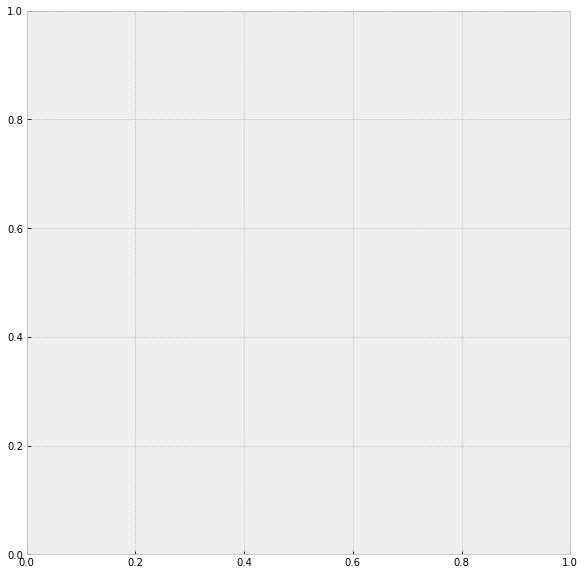

In [62]:
import numpy as np
from io import StringIO
import pandas as pd
from tqdm import tqdm

lat1 = 51.81
lng1 = -1.29
lat2 = 51.18
lng2 = 0.55

grid_x = np.linspace(lng1, lng2, 20)
grid_y = np.linspace(lat1, lat2, 20)

grid_x, grid_y = np.meshgrid(grid_x, grid_y)

liths = list()

for lng, lat in tqdm(zip(grid_x.flatten(), grid_y.flatten())):
    
    request_params = {
        "lat": lat,
        "lng": lng,
        "format": "csv",
    }

    result = requests.get(link, params=request_params).content
    result = StringIO(str(result, 'utf-8'))
    result = pd.read_csv(result)
    liths.append(result.loc[0, 'liths'])

liths = np.array(liths).reshape(grid_x.shape) 

In [64]:
from copy import deepcopy
hold = deepcopy(liths)

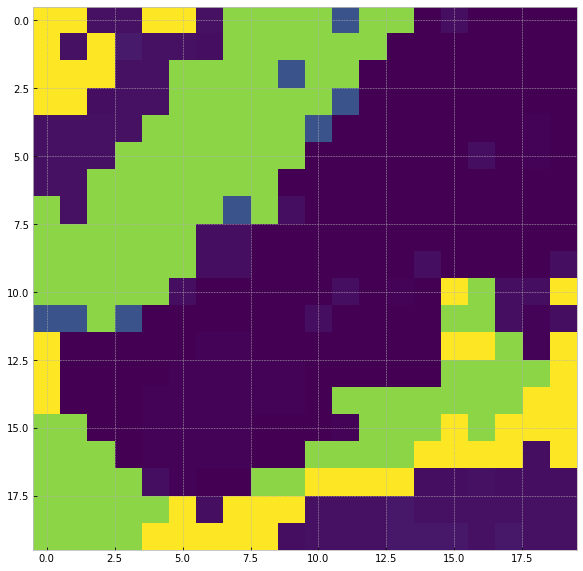

In [68]:
new = np.array([
    int(val.split(',')[0]) for val in liths.flatten()
]).reshape(grid_x.shape)

# for val in liths.flatten():
#     try:
#         int(val.split([','])[0])
#     except:
#         print(val)


fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.imshow(new)
plt.show()

In [17]:
from pathlib import Path
import os
import pandas as pd

with open(Path(os.getcwd()) / 'test.csv', 'wb') as f:
    f.write(result.content) 

pd.read_csv()
a



In [84]:
requests.get("https://macrostrat.org/api/geologic_units/map").json()

{'success': {'v': 2,
  'license': 'CC-BY 4.0',
  'description': 'Geologic map units from various data sources',
  'options': {'parameters': {'scale': "Can be 'small', 'medium', or 'large'",
    'map_id': 'integer, one or more polygon map_ids to search for',
    'lat': 'A valid latitude in decimal degrees',
    'lng': 'A valid longitude in decimal degrees',
    'strat_name_id': 'integer, one or more valid strat_name_ids from /defs/strat_names',
    'unit_id': 'integer, one or more valid unit_ids from /units',
    'format': 'Desired output format'},
   'output_formats': ['json',
    'csv',
    'geojson',
    'geojson_bare',
    'topojson',
    'topojson_bare'],
   'examples': ['/api/v2/geologic_units/map?lat=43&lng=-89.3'],
   'fields': {'map_id': '',
    'source_id': 'integer, unique Burwell source',
    'name': 'text, the name of the entity',
    'strat_name': 'text, informal unit name',
    'lith': 'text, specific lithology, see /defs/lithologies',
    'descrip': 'text, description of

In [113]:
import geopandas as gpd
# requests.get("https://macrostrat.org/api/geologic_units/map/").text
# link =       "https://macrostrat.org/api/geologic_units/map"
# requests.get("https://macrostrat.org/api/").text
# requests.get("https://macrostrat.org/api/grids/latitude").json()
# requests.get("https://macrostrat.org/api/geologic_units/map").json()
# requests.get("https://macrostrat.org/api/grids/longitude").json()
request_params = {
    "lat": 50.5072,
    "lng": 0.1276,
    "format": "geojson_bare",
    }
res = requests.get("https://macrostrat.org/api/geologic_units/map", params=request_params).content
res = StringIO(str(res, 'utf-8'))
# gdf = pd.read_csv(res)
gdf = gpd.read_file(res)
gdf.head()

DriverError: '/vsimem/c64cc1e96a9940c78f4b3c093d017b74' not recognized as a supported file format.

In [98]:
gdf.loc[0]

map_id                                                     3156265
source_id                                                      147
name                                              Eocene claystone
strat_name                                                        
lith                                                     claystone
descrip                                                           
comments                                                          
t_int_id                                                        24
t_int_age                                                     33.9
t_int_name                                                  Eocene
b_int_id                                                        24
b_int_age                                                       56
b_int_name                                                  Eocene
color                                                      #FDB46C
t_age                                                         

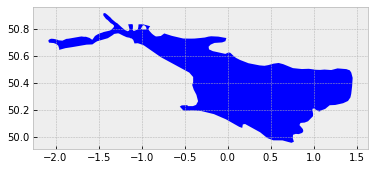

In [96]:
gdf.plot()

In [35]:
result = requests.get("https://macrostrat.org/api/v2/grids/latitude?lngSpacing=5&latSpacing=12&format=geojson_bare")
# result

In [72]:
requests.get("https://macrostrat.org/api/formulas").json()

{'error': {'message': '404: Page not found'}}

In [39]:
with open(Path(os.getcwd()) / "test.geojson", "wb") as f:
    f.write(result.content)

In [47]:
import geopandas as gpd

df = gpd.read_file(Path(os.getcwd()) / "test.geojson", index_col=0)

In [49]:
print(df.info())
print(df.area.mean())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        1728 non-null   int64   
 1   area      1728 non-null   int64   
 2   geometry  1728 non-null   geometry
dtypes: geometry(1), int64(2)
memory usage: 40.6 KB
None
37.49999999999974


C:\Users\s2216495\AppData\Local\Temp/ipykernel_24444/1495703126.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(df.area.mean())


In [119]:
a = dict(a=3, c=5)
print(a)
a.update(c=4)
a

{'a': 3, 'c': 5}


{'a': 3, 'c': 4}

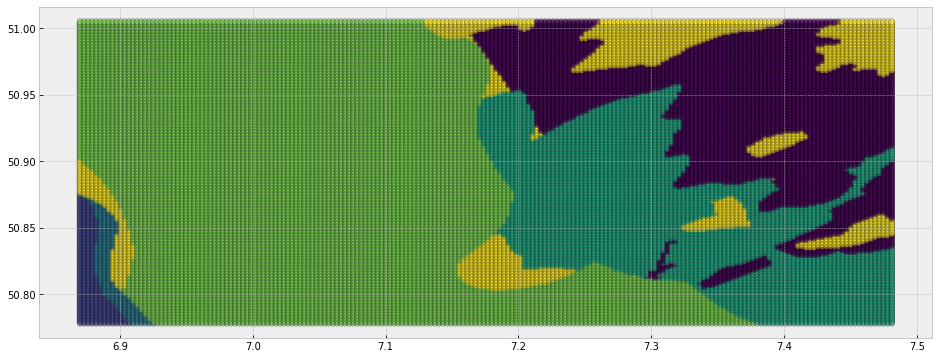

In [185]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
plt.style.use("bmh")
import numpy as np
from io import StringIO
import requests
import pandas as pd
from tqdm import tqdm

def get_lithography(grid):
    """
    Retrieves lithology for passed grid from macrostrat.org/api
    """    
    api = "https://macrostrat.org/api/geologic_units/map"
    request_params = dict(
        format="geojson_bare"
    )

    for idx, row in grid.iterrows():
        
        if not grid.loc[idx, "lith"] == -1:
            continue        

        request_params.update(lat=row.lat)
        request_params.update(lng=row.lng)

        result = requests.get(api, params=request_params).content
        result = StringIO(str(result, "utf-8"))
        result = gpd.read_file(result)
        result = result.iloc[:1]

        polygon = result.loc[0, "geometry"]
        lith = result.loc[0, "lith"]

        assign_mask = (
            grid["geometry"].within(polygon)).multiply(
            grid["lith"] == -1
        )
        grid.loc[assign_mask, "lith"] = lith

    all_liths = list(set(grid["lith"]))
    grid["lith"] = grid["lith"].apply(lambda entry: all_liths.index(entry))

    fig, ax = plt.subplots(1, 1, figsize=(16, 12))

    grid.plot(ax=ax, 
            edgecolor='k',
            column="lith",
            alpha=0.5,
            ) 

    plt.show()
    return grid, all_liths


if __name__ == "__main__":

    lng1 = 6.870
    lng2 = 7.481
    lat1 = 50.778
    lat2 = 51.005

    grid_x = np.linspace(lng1, lng2, 200)
    grid_y = np.linspace(lat1, lat2, 200)

    grid_x, grid_y = np.meshgrid(grid_x, grid_y)

    gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(
        grid_x.flatten(), grid_y.flatten()))

    gdf["lng"] = grid_x.flatten()
    gdf["lat"] = grid_y.flatten()
    gdf["lith"] = (np.ones(len(gdf)) * (-1)).astype("int")

    """
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))

    gdf.plot(ax=ax, 
             edgecolor='k',
             column="lng", 
             ) 

    plt.show()
    """

    result, all_liths = get_lithography(gdf)

{'': 0, 'Sand, gravel': 1, 'Clay, silt, sand, gravel; lignite': 2, 'Argillaceous shale and/or slate, graywacke, sandstone': 3, 'Major:{clay}, Minor{silt,sand,gravel}': 4, 'sedimentary rocks': 5}


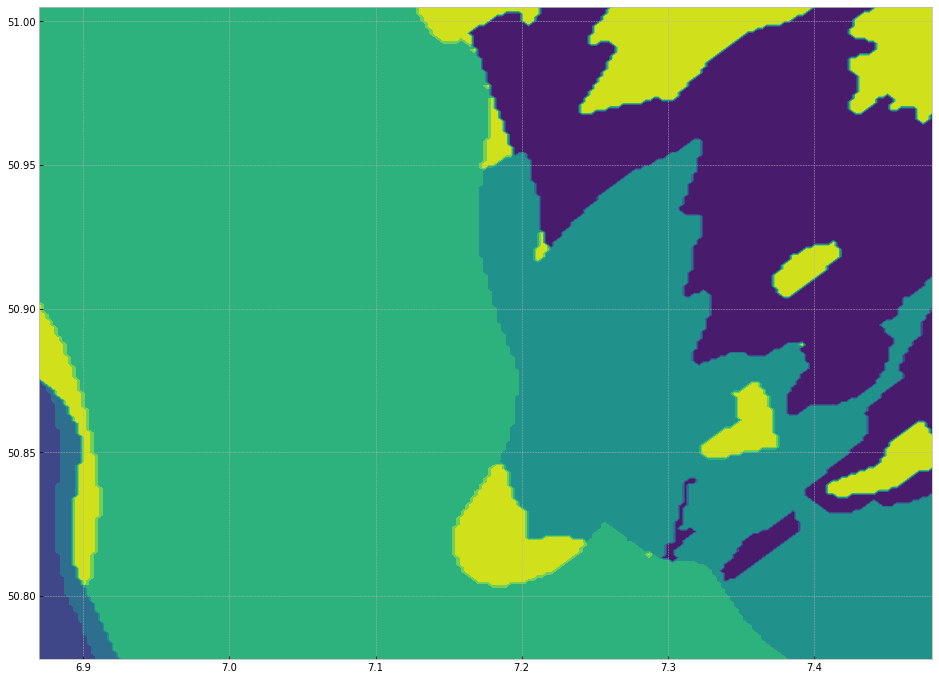

In [186]:
print({item: key for key, item in enumerate(all_liths)})

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
#print(result["lith"].to_numpy())
# ax.imshow(result["lith"].to_numpy().reshape(grid_x.shape))
ax.contourf(grid_x, grid_y, result["lith"].to_numpy().reshape(grid_x.shape))

plt.show()

In [183]:
api = "https://macrostrat.org/api/geologic_units/map"
request_params = dict(
    format="geojson_bare"
)

request_params.update(lat=53.19031)
request_params.update(lng=-1.024668)

result = requests.get(api, params=request_params).content
result = StringIO(str(result, "utf-8"))
result = gpd.read_file(result)

In [184]:
result

,map_id,source_id,name,strat_name,lith,descrip,comments,t_int_id,t_int_age,t_int_name,b_int_id,b_int_age,b_int_name,color,t_age,b_age,best_int_name,geometry
0,2032435,23,Triassic Rocks (Undifferentiated),,"sandstone and conglomerate, interbedded",,,63,201.3,Triassic,63,251.902,Triassic,#812B92,201.3,251.902,Triassic,"MULTIPOLYGON (((-1.17111 54.62119, -1.18850 54..."
1,3191056,154,Mesozoic sedimentary rocks,,sedimentary rocks,,,34,66.0,Late Cretaceous,34,100.500,Late Cretaceous,#A6D84A,66.0,100.500,Late Cretaceous,"MULTIPOLYGON (((-1.19197 54.68464, -1.19000 54..."
2,3157041,147,Early Triassic sandstone,,sandstone,,,213,247.2,Early Triassic,213,251.902,Early Triassic,#983999,247.2,251.902,Early Triassic,"MULTIPOLYGON (((-0.97785 53.50699, -0.97396 53..."
